In [52]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [53]:
# import data

compaines = pd.read_csv('1000_Companies.csv')
x = compaines.iloc[:,:-1].values # all columns except the last column
y = compaines.iloc[:,4].values
compaines.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


<AxesSubplot:>

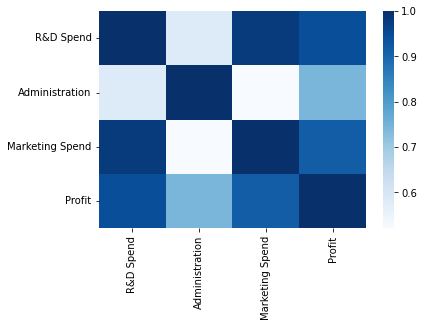

In [54]:
# data visualisation
# building the correlation matrix

sns.heatmap(compaines.corr(), cmap="Blues") # Never forget the () after corr()

In [55]:
# Encoding categorial data
# from the data shown above, we know the 'State' column is string, not numerical variable, we need to change the format

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
# LabelEncoder: Encode target labels with value between 0 and n_classes-1
# OneHotEncoder: Encode categorical features as a one-hot numeric array.
# ColumnTransformer: Applies transformers to columns of an array or pandas DataFrame.

labelencoder = LabelEncoder()
x[:,3] = labelencoder.fit_transform(x[:,3]) # this column is 'State', we need to change them into values

ct = ColumnTransformer( [ ("State",OneHotEncoder(),[3])],remainder='passthrough')
x = ct.fit_transform(x)

In [56]:
# Aviod the dummy variable trap
x =x[:,1:]

# the computer automatically transformed the header into the setup and it's automatically transformed with all these
# different variables. So when we did the encoder, the encoder created true columns and we need to do is just have the
# one because it has both the variable and the name. 
# That is what this piece of code does here.

In [57]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [58]:
# fitting multiple linear regression model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [62]:
# predicting
y_pred = regressor.predict(x_test)

In [65]:
# caculate the intercept and coefficient
print(f"the intercept is {regressor.intercept_}")
print(f"the coefficient is {regressor.coef_}")

the intercept is -51035.22972405041
the coefficient is [-8.80536598e+02 -6.98169073e+02  5.25845857e-01  8.44390881e-01
  1.07574255e-01]


In [67]:
# Evaluating the model
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9112695892268861

In [68]:
# the other way to calculate the r^2
regressor.score(x_test,y_test)


# NOTICE: the different inputs for r2_score and model.score

0.9112695892268861